In [0]:
from sklearn.datasets import load_iris
import numpy as np

In [0]:
iris = load_iris()

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# input shape
iris['data'].shape

(150, 4)

In [5]:
# output shape
iris['target'].shape

(150,)

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
x = iris['data']
y = iris['target']

In [8]:
## create an array for indices
indices = np.arange(x.shape[0])
print(indices)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]


In [0]:
## randomly shuffle it
np.random.shuffle(indices)

In [10]:
indices

array([ 61,  69,   3, 124, 143,  76, 114,  88,  12,  52,  40,  10,  81,
        44,  14,  19, 135,  47,  94, 122,  29,   4, 130,  55,  28,  71,
        82, 144,  57, 109, 110,   9,  17, 119, 102,  39, 145,  34, 100,
       128,  87,   6,  27,  33,  60,   5, 137,  86,  80,  48,  90,  77,
        18, 111,  11,  53, 142,  25,  97, 108, 146, 149,  62, 141,  15,
        96, 104,  85,  64,  23,   8,  43, 148,  83,  49,  68,  65, 139,
        56,  70,  74, 103, 105,   2,  24,  79,  58,  16,  72,   7,  26,
        54, 123,  42, 112, 120,  45, 136,   1,  95,  32,  21, 133,  51,
       129,  93, 107,  78, 116,  13,  99,   0,  75,  59,  84, 117, 132,
        38, 140,  50,  98,  91, 126,  89, 134, 118,  73, 101,  31,  35,
       147, 127, 138, 106,  36,  46,  66,  92,  41,  22, 115,  63,  67,
        20, 125, 121,  37,  30, 113, 131])

In [11]:
## One-hot encoding
from keras.utils import to_categorical
y_oh = to_categorical(y, 3)

Using TensorFlow backend.


In [0]:
## train- test split
train_frac = 0.8
train_samples = indices[:int(train_frac*x.shape[0])]
test_samples = indices[int(train_frac*x.shape[0]):]

x_train = x[train_samples]
y_train = y_oh[train_samples]

x_test = x[test_samples]
y_test = y_oh[test_samples]

In [13]:
## max and min values in train dataset
print(np.amax(x_train, axis = 0))
print(np.amin(x_train, axis = 0))

[7.7 4.4 6.7 2.5]
[4.3 2.  1.1 0.1]


In [0]:
## Normalize data after train test split
x_train_n = x_train/np.amax(x_train, axis = 0)
x_test_n = x_test/np.amax(x_train, axis = 0)

In [15]:
x_train.shape
##x0.shape =  (120, 4, 5); x0.shape[1:]

(120, 4)

In [16]:
## Keras build model
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape = (x_train.shape[1:]))
hidden_layer_1 = Dense(16, activation = 'sigmoid')(input_layer)
hidden_layer_2 = Dense(20, activation = 'tanh')(hidden_layer_1)
output_layer = Dense(3, activation = 'softmax')(hidden_layer_2)

model = Model(inputs = [input_layer], outputs = [output_layer])

##compiling the model
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',  metrics = ['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 200, batch_size = 10)

Instructions for updating:
Use tf.cast instead.
Train on 108 samples, validate on 12 samples
Epoch 1/200
108/108 [==============================] - 3s 26ms/step - loss: 1.1753 - acc: 0.4167 - val_loss: 1.0966 - val_acc: 0.3333
Epoch 2/200
108/108 [==============================] - 0s 318us/step - loss: 1.1299 - acc: 0.3889 - val_loss: 1.0905 - val_acc: 0.5000
Epoch 3/200
108/108 [==============================] - 0s 307us/step - loss: 1.1072 - acc: 0.5000 - val_loss: 1.0868 - val_acc: 0.5833
Epoch 4/200
108/108 [==============================] - 0s 315us/step - loss: 1.0924 - acc: 0.4722 - val_loss: 1.0843 - val_acc: 0.5833
Epoch 5/200
108/108 [==============================] - 0s 307us/step - loss: 1.0809 - acc: 0.4630 - val_loss: 1.0790 - val_acc: 0.5000
Epoch 6/200
108/108 [==============================] - 0s 299us/step - loss: 1.0707 - acc: 0.4537 - val_loss: 1.0747 - val_acc: 0.5000
Epoch 7/200
108/108 [==============================] - 0s 290us/step - loss: 1.0599 - acc: 0.5463 

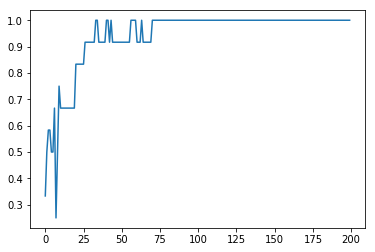

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_acc'])

In [19]:
model.evaluate(x_test)

30/30 [==============================] - 0s 91us/step


[0.24841617047786713, 1.0]

In [0]:
ypred = model.predict(x_test)

In [23]:
ypred.shape

(30, 3)

In [24]:
np.argmax(ypred, axis = 1)

array([1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 2])

In [0]:
y_test_true = np.argmax(y_test, axis = 1)

In [26]:
y_test_true


array([1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 2])